In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

In [2]:
def Leer_Datos( name, delmt = '\t',head = None):
    data = pd.read_csv(name,delimiter = delmt, header = head, dtype = np.float64)
    return data.values

def Normalizar_Datos( arraynp ):
    mean = np.mean(arraynp,0)
    standard = np.std(arraynp,0)
    for i in range(0,arraynp.shape[0]):
        arraynp[i] = np.true_divide((arraynp[i] - mean), standard)
    return arraynp

def Crear_Entrenamiento_Prueba( array):
    train , test = np.split(array,[int(0.7*len(array))])
    return train,test

In [3]:
#   ex1data2(Home_1f).csv - Precio Viviendas
H_train_x = Leer_Datos("train/Home_train_X.csv")
H_train_y = Leer_Datos("train/Home_train_Y.csv")
H_test_x = Leer_Datos("test/Home_test_X.csv")
H_test_y = Leer_Datos("test/Home_test_Y.csv")

#   oceano_simple.csv - Temperatura Océano
O_train_x = Leer_Datos("train/Oceano_train_X.csv")
O_train_y = Leer_Datos("train/Oceano_train_Y.csv")
O_test_x = Leer_Datos("test/Oceano_test_X.csv")
O_test_y = Leer_Datos("test/Oceano_test_Y.csv")

#   petrol_consumption.csv - Consumo de Petróleo
P_train_x = Leer_Datos("train/Petroleo_train_X.csv")
P_train_y = Leer_Datos("train/Petroleo_train_Y.csv")
P_test_x = Leer_Datos("test/Petroleo_test_X.csv")
P_test_y = Leer_Datos("test/Petroleo_test_Y.csv")

##################### PRE-CALCULADO #####################
# train_x = Normalizar_Datos(train_x)
# train_y = Normalizar_Datos(train_y)
# test_x = Normalizar_Datos(test_x)
# test_y = Normalizar_Datos(test_y)

H_full_data = np.concatenate((np.concatenate((H_train_x,H_test_x)),
                              np.concatenate((H_train_y,H_test_y))),axis=1)
print ("Precio Vivienda\tMean:",np.mean(H_full_data,0),
       "\tSTD:",np.std(H_full_data,0))

O_full_data = np.concatenate((np.concatenate((O_train_x,O_test_x)),
                              np.concatenate((O_train_y,O_test_y))),axis=1)
print ("Temperatura Océano\tMean:",np.mean(O_full_data,0),
       "\tSTD:",np.std(O_full_data,0))

P_full_data = np.concatenate((np.concatenate((P_train_x,P_test_x)),
                              np.concatenate((P_train_y,P_test_y))),axis=1)
print ("Consumo Petróleo\tMean:",np.mean(P_full_data,0),
       "\tSTD:",np.std(P_full_data,0))

H_train_x = np.insert(H_train_x, 0, 1, axis=1)
H_test_x = np.insert(H_test_x, 0, 1, axis=1)
H_Theta = np.zeros(H_train_x.shape[1])[np.newaxis]

O_train_x = np.insert(O_train_x, 0, 1, axis=1)
O_test_x = np.insert(O_test_x, 0, 1, axis=1)
O_Theta = np.zeros(O_train_x.shape[1])[np.newaxis]

P_train_x = np.insert(P_train_x, 0, 1, axis=1)
P_test_x = np.insert(P_test_x, 0, 1, axis=1)
P_Theta = np.zeros(P_train_x.shape[1])[np.newaxis]

Precio Vivienda	Mean: [ 4.72435330e-18 -6.14165929e-17] 	STD: [1. 1.]
Temperatura Océano	Mean: [-3.82802202e-15  1.33046970e-16] 	STD: [1. 1.]
Consumo Petróleo	Mean: [ 4.07081776e-16  5.18104078e-16 -1.15648232e-16  1.67458640e-15
 -3.33066907e-16] 	STD: [1. 1. 1. 1. 1.]


In [4]:
def Calcular_Costo(X, Y, Theta):
    m = len(X)
    cost = np.sum((X.dot(Theta.T) - Y)**2) / (2 * m)
    return cost

def Gradiente_Descendiente(X, Y, Theta, iteraciones, tasa):
    costos = [0]*iteraciones
    m = len(X)
    for itr in range(iteraciones):
        h = X.dot(Theta.T)
        dif = h - Y
        derivada = (X.T).dot(dif) / m
        Theta = Theta - (tasa * derivada).T
        costos[itr] = Calcular_Costo(X, Y, Theta)
    return Theta, costos

def Ecuacion_Normal(X, Y):
    Theta = np.linalg.inv(X.T.dot(X))
    Theta = Theta.dot(X.T)
    Theta = Theta.dot(Y)
    return Theta.T

def MSE(Y_hat, Y):
#   Y_hat = X.dot(Theta.T)
    M = len(Y)
    return np.sum((Y_hat - Y)**2) / M

In [5]:
#    Experimento 1
H_Theta_EN = Ecuacion_Normal(H_train_x,H_train_y)
O_Theta_EN = Ecuacion_Normal(O_train_x,O_train_y)
P_Theta_EN = Ecuacion_Normal(P_train_x,P_train_y)

mse_H_t = MSE(H_train_x.dot(H_Theta_EN.T),H_train_y)
mse_O_t = MSE(O_train_x.dot(O_Theta_EN.T),O_train_y)
mse_P_t = MSE(P_train_x.dot(P_Theta_EN.T),P_train_y)

mse_H = MSE(H_test_x.dot(H_Theta_EN.T),H_test_y)
mse_O = MSE(O_test_x.dot(O_Theta_EN.T),O_test_y)
mse_P = MSE(P_test_x.dot(P_Theta_EN.T),P_test_y)

df = pd.DataFrame({'Precio Vivienda':[mse_H_t,mse_H],'Temperatura Océano':[mse_O_t,mse_O],'Consumo Petróleo':[mse_P_t,mse_P]},
                  index=["Conjunto de Entrenamiento","Conjunto de Prueba"])
#print(df)                        
display(HTML(df.to_html()))

,Precio Vivienda,Temperatura Océano,Consumo Petróleo
Conjunto de Entrenamiento,0.292740,0.169704,0.211136
Conjunto de Prueba,0.245661,0.114843,0.711440


In [6]:
#    Experimento 2
tasa_aprendizaje = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]#[0.4, 0.3, 0.2, 0.1, 0.05, 0.01]#
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]#[3500,3000,2500,2000,1500,1000,500]#

matrix_MSE = np.zeros((len(tasa_aprendizaje),len(iteraciones)))

parametros = (0,0)
for ta in range(len(tasa_aprendizaje)):
    for itr in range(len(iteraciones)):
        cur_Theta, _ = Gradiente_Descendiente(H_train_x, H_train_y, H_Theta, iteraciones[itr], tasa_aprendizaje[ta])
        matrix_MSE[ta,itr] = MSE(H_test_x.dot(cur_Theta.T), H_test_y)
        if(matrix_MSE[ta,itr] < matrix_MSE[parametros[0],parametros[1]]):
            parametros = (ta, itr)
        
print("Precio Viviendas, menor MSE con:",tasa_aprendizaje[parametros[0]],iteraciones[parametros[1]])
df1 = pd.DataFrame(data = matrix_MSE, index= tasa_aprendizaje, columns = iteraciones)
display(HTML(df1.to_html()))

parametros = (0,0)
for ta in range(len(tasa_aprendizaje)):
    for itr in range(len(iteraciones)):
        cur_Theta, _ = Gradiente_Descendiente(O_train_x, O_train_y, O_Theta, iteraciones[itr], tasa_aprendizaje[ta])
        matrix_MSE[ta,itr] = MSE(O_test_x.dot(cur_Theta.T),O_test_y)
        if(matrix_MSE[ta,itr] < matrix_MSE[parametros[0],parametros[1]]):
            parametros = (ta, itr)

print("\nTemperatura Océano, menor MSE con:",tasa_aprendizaje[parametros[0]],iteraciones[parametros[1]])
df2 = pd.DataFrame(data = matrix_MSE, index= tasa_aprendizaje, columns = iteraciones)
display(HTML(df2.to_html()))

parametros = (0,0)
for ta in range(len(tasa_aprendizaje)):
    for itr in range(len(iteraciones)):
        cur_Theta, _ = Gradiente_Descendiente(P_train_x, P_train_y, P_Theta, iteraciones[itr], tasa_aprendizaje[ta])
        matrix_MSE[ta,itr] = MSE(P_test_x.dot(cur_Theta.T),P_test_y)
        if(matrix_MSE[ta,itr] < matrix_MSE[parametros[0],parametros[1]]):
            parametros = (ta, itr)
print("\nConsumo Petróleo, menor MSE con:",tasa_aprendizaje[parametros[0]],iteraciones[parametros[1]])
df3 = pd.DataFrame(data = matrix_MSE, index= tasa_aprendizaje, columns = iteraciones)
display(HTML(df3.to_html()))

Precio Viviendas, menor MSE con: 0.01 500


,500,1000,1500,2000,2500,3000,3500
0.01,0.241804,0.245629,0.245661,0.245661,0.245661,0.245661,0.245661
0.05,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.10,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.20,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.30,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.40,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661



Temperatura Océano, menor MSE con: 0.2 500


,500,1000,1500,2000,2500,3000,3500
0.01,0.115236,0.114845,0.114844,0.114843,0.114843,0.114843,0.114843
0.05,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.10,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.20,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.30,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.40,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843



Consumo Petróleo, menor MSE con: 0.01 500


,500,1000,1500,2000,2500,3000,3500
0.01,0.684621,0.703287,0.709549,0.711014,0.711345,0.711419,0.711435
0.05,0.711349,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.10,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.20,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.30,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.40,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440


Pesos con Gradiente Descendiente
[[0.04945348 0.9262821 ]]
Pesos con Ecuación Normal
[[0.04941133 0.93421781]]


Text(0, 0.5, 'Precio')

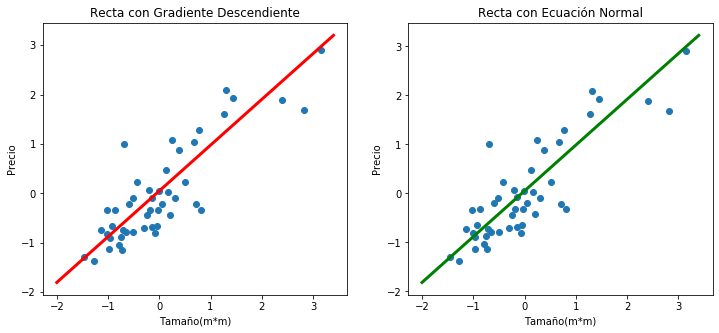

In [7]:
#    Experimento 3.1
fig, ax = plt.subplots(1,2,figsize=(12,5))

all_points_x = np.concatenate((H_train_x,H_test_x))[:,1]

Theta_GD, _ = Gradiente_Descendiente(H_train_x, H_train_y, H_Theta, iteraciones[0], tasa_aprendizaje[0])
Theta_EN = Ecuacion_Normal(H_train_x, H_train_y)

X_rct = np.arange(-2,3.5,0.1)[np.newaxis].T
X_rct = np.insert(X_rct, 0, 1, axis=1)
Y_GD = X_rct.dot(Theta_GD.T)
Y_EN = X_rct.dot(Theta_EN.T)

print("Pesos con Gradiente Descendiente")
print(Theta_GD)
print("Pesos con Ecuación Normal")
print(Theta_EN)

ax[0].scatter(all_points_x,np.concatenate((H_train_y, H_test_y)))
ax[0].plot(X_rct[:,1],Y_GD,'-r',linewidth=3.0)
ax[0].set_title("Recta con Gradiente Descendiente")
ax[0].set_xlabel("Tamaño(m*m)")
ax[0].set_ylabel("Precio")

ax[1].scatter(all_points_x,np.concatenate((H_train_y, H_test_y)))
ax[1].plot(X_rct[:,1],Y_EN,'-g',linewidth=3.0)
ax[1].set_title("Recta con Ecuación Normal")
ax[1].set_xlabel("Tamaño(m*m)")
ax[1].set_ylabel("Precio")


Pesos con Gradiente Descendiente
[[-0.00967191 -0.90518797]]
Pesos con Ecuación Normal
[[-0.00967191 -0.90518797]]


Text(0, 0.5, 'Temperatura')

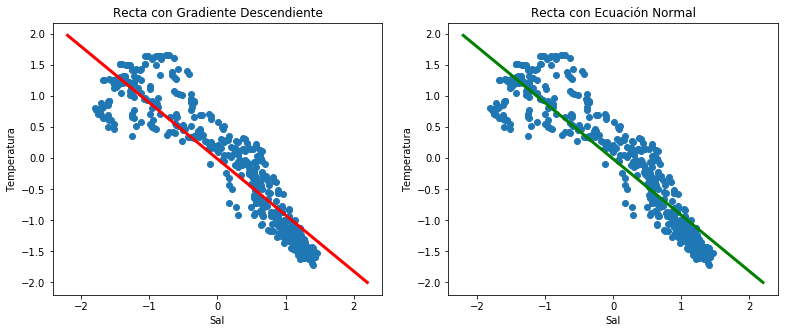

In [8]:
#    Experimento 3.2

fig, ax = plt.subplots(1,2,figsize=(13,5))

all_points_x = np.concatenate((O_train_x,O_test_x))[:,1]


Theta_GD, _ = Gradiente_Descendiente(O_train_x, O_train_y, O_Theta, iteraciones[0], tasa_aprendizaje[3])
Theta_EN = Ecuacion_Normal(O_train_x, O_train_y)

X_rct = np.arange(-2.2,2.3,0.1)[np.newaxis].T
X_rct = np.insert(X_rct, 0, 1, axis=1)
Y_GD = X_rct.dot(Theta_GD.T)
Y_EN = X_rct.dot(Theta_EN.T)

print("Pesos con Gradiente Descendiente")
print(Theta_GD)
print("Pesos con Ecuación Normal")
print(Theta_EN)

ax[0].scatter(all_points_x,np.concatenate((O_train_y, O_test_y)))
ax[0].plot(X_rct[:,1],Y_GD,'-r',linewidth=3.0)
ax[0].set_title("Recta con Gradiente Descendiente")
ax[0].set_xlabel('Sal')
ax[0].set_ylabel('Temperatura')

ax[1].scatter(all_points_x,np.concatenate((O_train_y, O_test_y)))
ax[1].plot(X_rct[:,1],Y_EN,'-g',linewidth=3.0)
ax[1].set_title("Recta con Ecuación Normal")
ax[1].set_xlabel('Sal')
ax[1].set_ylabel('Temperatura')




Text(0, 0.5, 'Costo')

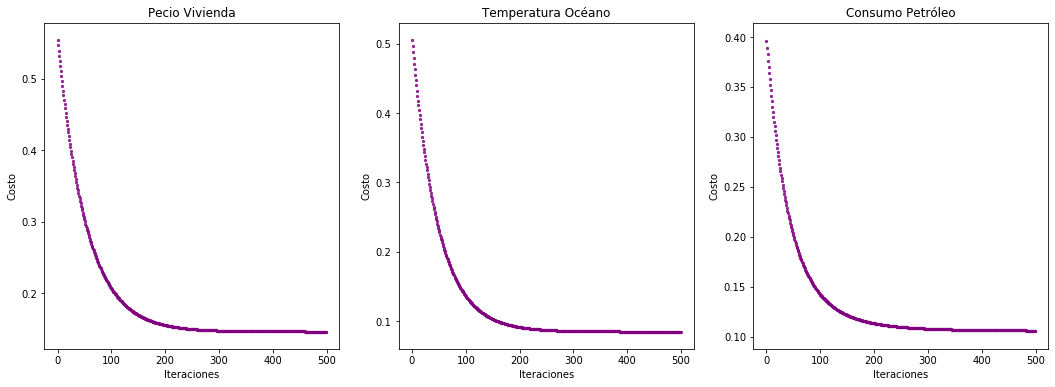

In [11]:
#    Experimento 4
fig, ax = plt.subplots(1,3,figsize=(18,6))

H_newTheta, costos = Gradiente_Descendiente(H_train_x, H_train_y, H_Theta, iteraciones[0], tasa_aprendizaje[0])
ax[0].scatter(np.arange(iteraciones[0]),costos,alpha=0.8, c="purple", s=5)
ax[0].set_title("Pecio Vivienda")
ax[0].set_xlabel('Iteraciones')
ax[0].set_ylabel('Costo')

O_newTheta, costos = Gradiente_Descendiente(O_train_x, O_train_y, O_Theta, iteraciones[0], tasa_aprendizaje[0])
ax[1].scatter(np.arange(iteraciones[0]),costos,alpha=0.8, c="purple", s=5)
ax[1].set_title("Temperatura Océano")
ax[1].set_xlabel('Iteraciones')
ax[1].set_ylabel('Costo')

P_newTheta, costos = Gradiente_Descendiente(P_train_x, P_train_y, P_Theta, iteraciones[0], tasa_aprendizaje[0])
ax[2].scatter(np.arange(iteraciones[0]),costos,alpha=0.8, c="purple", s=5)
ax[2].set_title("Consumo Petróleo")
ax[2].set_xlabel('Iteraciones')
ax[2].set_ylabel('Costo')

In [10]:
#    Comparación entre el trabajo desarrollado y LinearRegression() de la libreria sklearn
#     se utilizarón los mejores parámetros

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(H_train_x, H_train_y)
print ("Dataset: Precio Vivienda")
print ("Con sklearn:\t", reg.coef_)
print ("Scratch GD:\t", H_newTheta)
print ("Scratch EN:\t", H_Theta_EN)
print ("MSE de los theta entre sklearn y Scratch GD:",MSE(H_newTheta,reg.coef_))
print ("MSE de los theta entre sklearn y Scratch EN:",MSE(H_Theta_EN,reg.coef_),"\n")

reg = LinearRegression().fit(O_train_x, O_train_y)
print ("Dataset: Temperatura Océano")
print ("Con sklearn:\t",  reg.coef_)
print ("Scratch GD:\t", O_newTheta)
print ("Scratch EN:\t", O_Theta_EN)
print ("MSE de los theta entre sklearn y Scratch GD:",MSE(O_newTheta,reg.coef_))
print ("MSE de los theta entre sklearn y Scratch EN:",MSE(O_Theta_EN,reg.coef_),"\n")

reg = LinearRegression().fit(P_train_x, P_train_y)
print ("Dataset: Consumo Petróleo")
print ("Con sklearn:\t", reg.coef_)
print ("Scratch GD:\t", P_newTheta)
print ("Scratch EN:\t", P_Theta_EN)
print ("MSE de los theta entre sklearn y Scratch GD:",MSE(P_newTheta,reg.coef_))
print ("MSE de los theta entre sklearn y Scratch EN:",MSE(P_Theta_EN,reg.coef_),"\n")

Dataset: Precio Vivienda
Con sklearn:	 [[0.         0.93421781]]
Scratch GD:	 [[0.04945348 0.9262821 ]]
Scratch EN:	 [[0.04941133 0.93421781]]
MSE de los theta entre sklearn y Scratch GD: 0.0025086221736152392
MSE de los theta entre sklearn y Scratch EN: 0.002441479921680216 

Dataset: Temperatura Océano
Con sklearn:	 [[ 0.         -0.90518797]]
Scratch GD:	 [[-0.00967191 -0.90518797]]
Scratch EN:	 [[-0.00967191 -0.90518797]]
MSE de los theta entre sklearn y Scratch GD: 9.354576199953138e-05
MSE de los theta entre sklearn y Scratch EN: 9.354576199953229e-05 

Dataset: Consumo Petróleo
Con sklearn:	 [[ 0.         -0.09203601 -0.36687041  0.1072892   0.64775736]]
Scratch GD:	 [[-0.08529095 -0.12570974 -0.35839411  0.07942067  0.62674796]]
Scratch EN:	 [[-0.08752625 -0.09203601 -0.36687041  0.1072892   0.64775736]]
MSE de los theta entre sklearn y Scratch GD: 0.00969836382607144
MSE de los theta entre sklearn y Scratch EN: 0.0076608436746581215 

